<a href="https://colab.research.google.com/github/iamafifaah/Google-Colab/blob/main/Stacking_Layer_Rasterio_vs_GDAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
pip install rasterio

In [151]:
pip install pyspatialml

In [152]:
from pyspatialml import Raster
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import rasterio.plot
import numpy as np
import matplotlib as mpl
import geopandas as gpd
import numpy as np
from tempfile import NamedTemporaryFile
import warnings
warnings.filterwarnings('ignore')

In [153]:
from osgeo import gdal
import os
import glob
import matplotlib.pyplot as plt
from rasterio.plot import show
import rasterio.mask

In [154]:
import glob

#------------------------------- Stack Layer with Different Extent -------------------------------

In [155]:
!pwd

/content


## Glob

In [156]:
raster_list = glob.glob('/content/raster/*.tif')

In [157]:
type(raster_list)

list

In [158]:
print(raster_list)

['/content/raster/1057_1040_LULC.tif', '/content/raster/1057_1040_NDBI.tif', '/content/raster/1057_1040_TWI.tif', '/content/raster/1057_1040_popdensity.tif', '/content/raster/1057_1040_nightlight.tif', '/content/raster/1057_1040_NDWI.tif', '/content/raster/1057_1040_profile_curvature.tif', '/content/raster/1057_1040_MNDWI.tif', '/content/raster/1057_1040_TPI.tif', '/content/raster/1057_1040_elevation.tif', '/content/raster/1057_1040_rainfall.tif', '/content/raster/1057_1040_sexratio.tif', '/content/raster/1057_1040_slope.tif']


In [159]:
stack = Raster(raster_list)

In [160]:
stack.names

dict_keys(['x1057_1040_LULC', 'x1057_1040_NDBI', 'x1057_1040_TWI', 'x1057_1040_popdensity', 'x1057_1040_nightlight', 'x1057_1040_NDWI', 'x1057_1040_profile_curvature', 'x1057_1040_MNDWI', 'x1057_1040_TPI', 'x1057_1040_elevation', 'x1057_1040_rainfall', 'x1057_1040_sexratio', 'x1057_1040_slope'])

In [161]:
from pyspatialml import Raster
import os
import matplotlib.pyplot as plt
import geopandas
import pandas as pd
import seaborn as sn
import rasterio.plot
import numpy as np
import matplotlib as mpl
import os
import geopandas as gpd
import numpy as np
from tempfile import NamedTemporaryFile
import warnings
warnings.filterwarnings('ignore')

In [162]:
for predictor_path in raster_list:
    try:
        with rasterio.open(f'/content/raster/{predictor_path}') as src:
            print(f"File: {predictor_path}")
            print(f"  Shape: {src.shape}")
            print(f"  Bounds (coordinates): {src.bounds}")
            print("-" * 20)
    except rasterio.errors.RasterioIOError as e:
        print(f"Error opening file {predictor_path}: {e}")

Error opening file /content/raster/1057_1040_LULC.tif: /content/raster//content/raster/1057_1040_LULC.tif: No such file or directory
Error opening file /content/raster/1057_1040_NDBI.tif: /content/raster//content/raster/1057_1040_NDBI.tif: No such file or directory
Error opening file /content/raster/1057_1040_TWI.tif: /content/raster//content/raster/1057_1040_TWI.tif: No such file or directory
Error opening file /content/raster/1057_1040_popdensity.tif: /content/raster//content/raster/1057_1040_popdensity.tif: No such file or directory
Error opening file /content/raster/1057_1040_nightlight.tif: /content/raster//content/raster/1057_1040_nightlight.tif: No such file or directory
Error opening file /content/raster/1057_1040_NDWI.tif: /content/raster//content/raster/1057_1040_NDWI.tif: No such file or directory
Error opening file /content/raster/1057_1040_profile_curvature.tif: /content/raster//content/raster/1057_1040_profile_curvature.tif: No such file or directory
Error opening file /c

## Rasterio

In [163]:
# lulc = rasterio.open('/content/raster/land_cover.tif')
# mndwi = rasterio.open('/content/raster/MNDWI.tif')
# ndbi = rasterio.open('/content/raster/NDBI.tif')
# ndwi = rasterio.open('/content/raster/NDWI.tif')
# nightlight = rasterio.open('/content/raster/nightlight.tif')
# dissriver = rasterio.open('/content/raster/dissriver.tif')
# dissriver = rasterio.open('/content/raster/disschannel.tif')
# slope = rasterio.open('/content/raster/slope.tif')
# topografi = rasterio.open('/content/raster/topografi.tif')
# popdensity = rasterio.open('/content/raster/popdensity.tif')
# sexratio = rasterio.open('/content/raster/sexratio.tif')
# twi = rasterio.open('/content/raster/twi.tif')

In [164]:
predictors = ['1057_1040_LULC.tif', '1057_1040_MNDWI.tif','1057_1040_NDBI.tif', '1057_1040_NDWI.tif','1057_1040_TPI.tif','1057_1040_TWI.tif', '1057_1040_elevation.tif',
              '1057_1040_nightlight.tif', '1057_1040_popdensity.tif', '1057_1040_profile_curvature.tif','1057_1040_rainfall.tif', '1057_1040_sexratio.tif', '1057_1040_slope.tif']


In [165]:
# stackpred = Raster('/content/raster/*.tif')

In [166]:
# predictors = ['land_cover.tif','MNDWI.tif','NDBI.tif','NDWI.tif','nightlight.tif','dissriver.tif','disschannel.tif','slope.tif','topografi.tif','popdensity.tif','sexratio.tif','twi.tif']

In [167]:
for predictor_path in predictors:
    try:
        with rasterio.open(f'/content/raster/{predictor_path}') as src:
            print(f"File: {predictor_path}")
            print(f"  Shape: {src.shape}")
            print(f"  Bounds (coordinates): {src.bounds}")
            print("-" * 20)
    except rasterio.errors.RasterioIOError as e:
        print(f"Error opening file {predictor_path}: {e}")

File: 1057_1040_LULC.tif
  Shape: (1040, 1057)
  Bounds (coordinates): BoundingBox(left=686595.0, bottom=9295425.0, right=718305.0, top=9326625.0)
--------------------
File: 1057_1040_MNDWI.tif
  Shape: (1040, 1057)
  Bounds (coordinates): BoundingBox(left=686595.0, bottom=9295425.0, right=718305.0, top=9326625.0)
--------------------
File: 1057_1040_NDBI.tif
  Shape: (1040, 1057)
  Bounds (coordinates): BoundingBox(left=686595.0, bottom=9295425.0, right=718305.0, top=9326625.0)
--------------------
File: 1057_1040_NDWI.tif
  Shape: (1040, 1057)
  Bounds (coordinates): BoundingBox(left=686595.0, bottom=9295425.0, right=718305.0, top=9326625.0)
--------------------
File: 1057_1040_TPI.tif
  Shape: (1040, 1057)
  Bounds (coordinates): BoundingBox(left=686595.0, bottom=9295425.0, right=718305.0, top=9326625.0)
--------------------
File: 1057_1040_TWI.tif
  Shape: (1040, 1057)
  Bounds (coordinates): BoundingBox(left=686595.0, bottom=9295425.0, right=718305.0, top=9326625.0)
--------------

In [168]:
type(predictors)

list

In [169]:
print(predictors)

['1057_1040_LULC.tif', '1057_1040_MNDWI.tif', '1057_1040_NDBI.tif', '1057_1040_NDWI.tif', '1057_1040_TPI.tif', '1057_1040_TWI.tif', '1057_1040_elevation.tif', '1057_1040_nightlight.tif', '1057_1040_popdensity.tif', '1057_1040_profile_curvature.tif', '1057_1040_rainfall.tif', '1057_1040_sexratio.tif', '1057_1040_slope.tif']


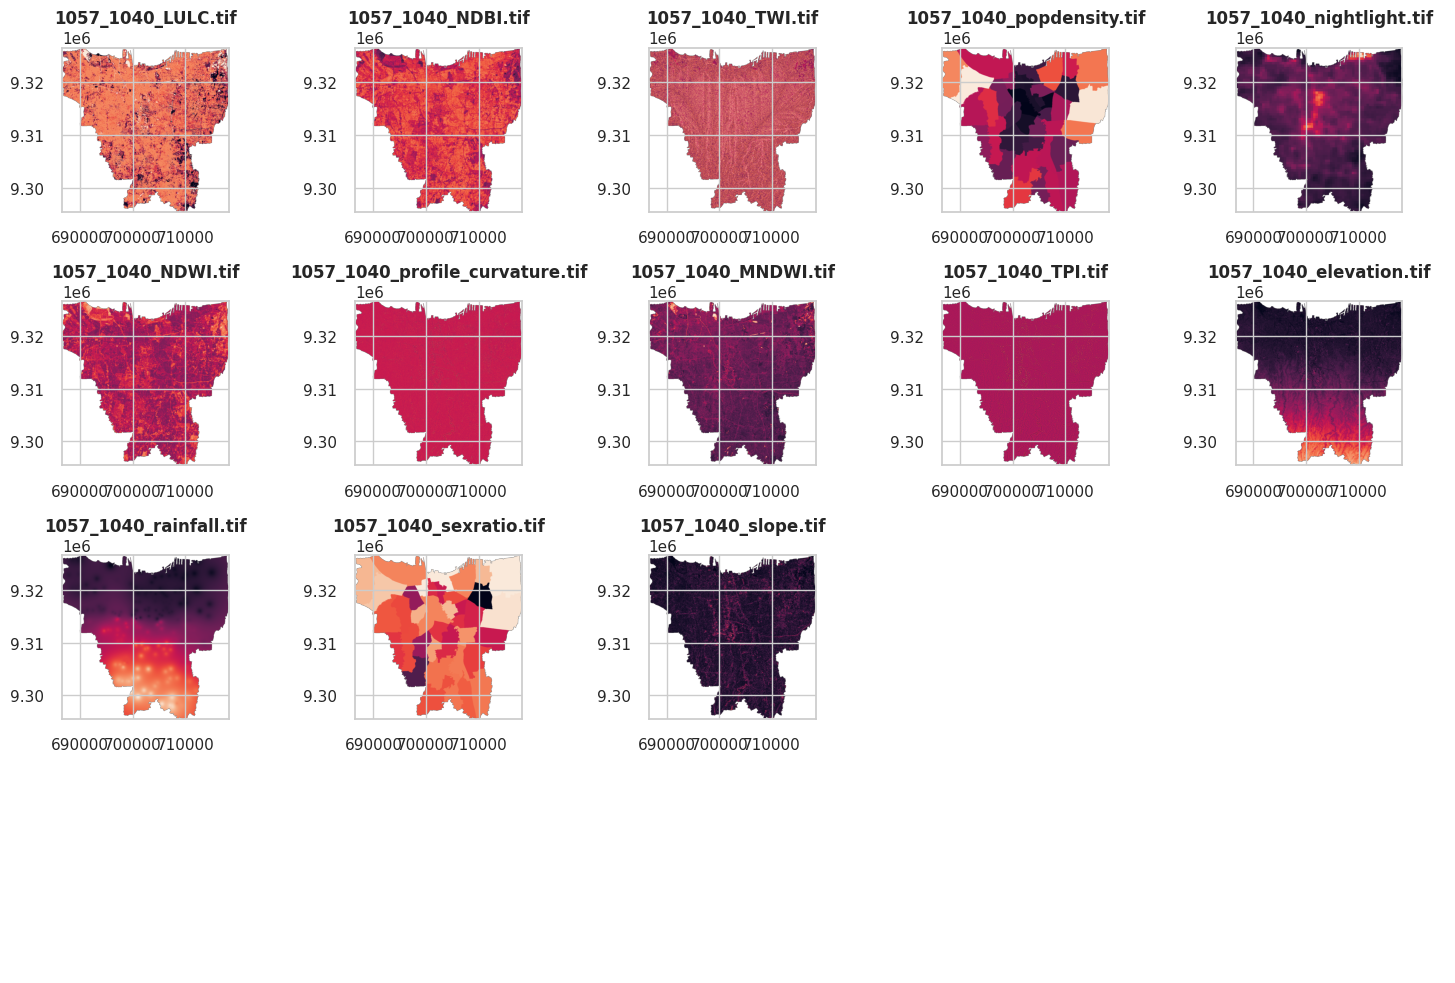

In [170]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 10))

# Flatten axes agar bisa diakses satu per satu dengan index tunggal
axes = axes.flatten()

for i, path in enumerate(raster_list):
    with rasterio.open(path) as src:
        filename = os.path.basename(path)
        show(src, ax=axes[i], title=filename)

# Turn off empty subplots if any
for j in range(len(raster_list), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [171]:
print(raster_list)

['/content/raster/1057_1040_LULC.tif', '/content/raster/1057_1040_NDBI.tif', '/content/raster/1057_1040_TWI.tif', '/content/raster/1057_1040_popdensity.tif', '/content/raster/1057_1040_nightlight.tif', '/content/raster/1057_1040_NDWI.tif', '/content/raster/1057_1040_profile_curvature.tif', '/content/raster/1057_1040_MNDWI.tif', '/content/raster/1057_1040_TPI.tif', '/content/raster/1057_1040_elevation.tif', '/content/raster/1057_1040_rainfall.tif', '/content/raster/1057_1040_sexratio.tif', '/content/raster/1057_1040_slope.tif']


In [172]:
# import rasterio
# from rasterio.plot import show
# import matplotlib.pyplot as plt
# # Create subplots
# fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))

# # Flatten axes agar bisa diakses satu per satu dengan index tunggal
# axes = axes.flatten()

# # Turn off empty subplots if any
# for j in range(len(predictors), len(axes)):
#     axes[j].axis('off')

# plt.tight_layout()
# plt.show()

# 25th July 2025
with glob, can created raster stacked, on the other side rasterio open can't created list of predictors

# Random Forest
## Exploratory Data Analysis

In [173]:
pip install geopandas

In [174]:
!pwd

/content


In [175]:
sampling = r'/content/Sampling.shp'

In [176]:
import geopandas as gpd

In [177]:
sampling = gpd.read_file(sampling)

In [178]:
sampling.head()

,ID,land_cover,rainfall,elevation,slope,TWI,disschanne,dissriver,MNDWI,NDBI,NDWI,nightlight,popdensity,sexratio,Class,X,Y,layer,geometry
0,1,4,4139.84,19.436800,5.93226,3.84336,1382.930,1261.780,-0.292838,0.085813,-0.028947,56.79,113147,99.61,1,701369.510,9312695.831,Flood,POINT (701369.510 9312695.831)
1,2,4,4141.11,0.135218,2.87524,5.03541,403.609,402.492,-0.286593,0.110816,-0.093184,39.97,165179,101.00,1,700081.126,9314170.987,Flood,POINT (700081.126 9314170.987)
2,3,5,4140.06,8.109330,1.76050,5.04900,966.075,1086.650,-0.475638,-0.069557,0.085849,46.67,165179,101.00,1,700121.837,9313451.405,Flood,POINT (700121.837 9313451.405)
3,4,5,4139.57,8.602600,1.61033,4.94122,939.149,1056.830,-0.475638,-0.069557,0.085849,46.67,165179,101.00,1,700129.401,9313462.440,Flood,POINT (700129.401 9313462.440)
4,5,4,4125.00,7.854300,4.91466,5.30018,150.000,256.320,-0.425449,0.177009,-0.172949,42.91,165179,101.00,1,700335.004,9314291.779,Flood,POINT (700335.004 9314291.779)


In [179]:
sampling.crs

<Projected CRS: EPSG:32748>
Name: WGS 84 / UTM zone 48S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, southern hemisphere between 80°S and equator, onshore and offshore. Indonesia.
- bounds: (102.0, -80.0, 108.0, 0.0)
Coordinate Operation:
- name: UTM zone 48S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

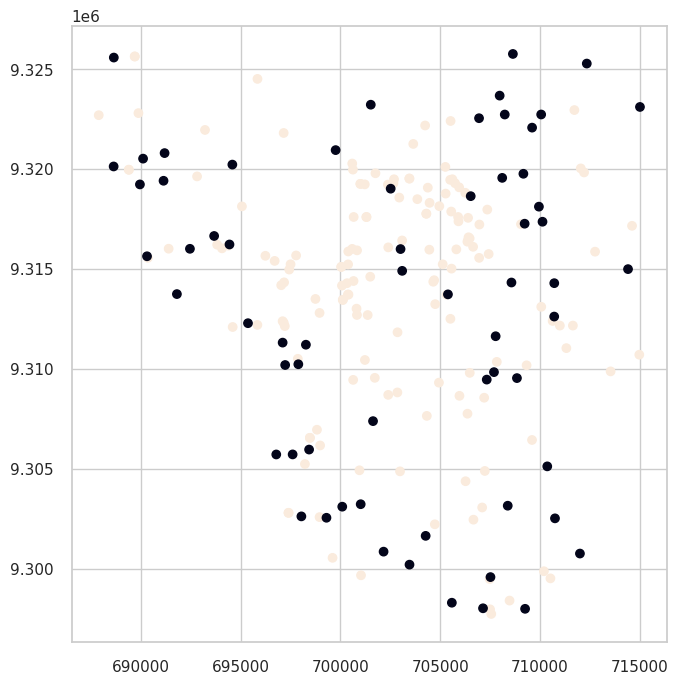

In [180]:
sampling.plot('Class')

In [181]:
batas = gpd.read_file('/content/Batas.shp')

In [182]:
batas.head()

,OBJECTID,GID_1,Shape_Leng,Shape_Area,geometry
0,1,IDN.7_1,203057.067677,6.429058e+08,"POLYGON ((690976.833 9326610.342, 691001.248 9..."


<Axes: >

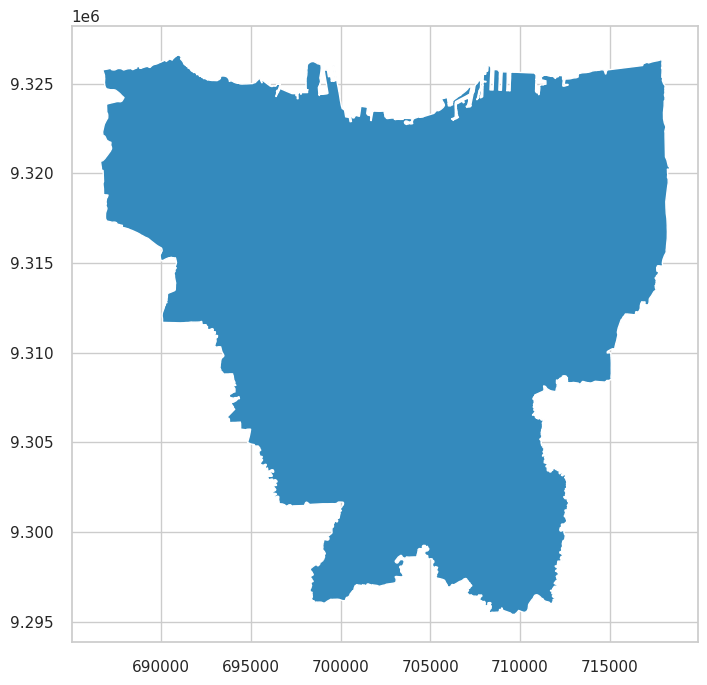

In [183]:
batas.plot()

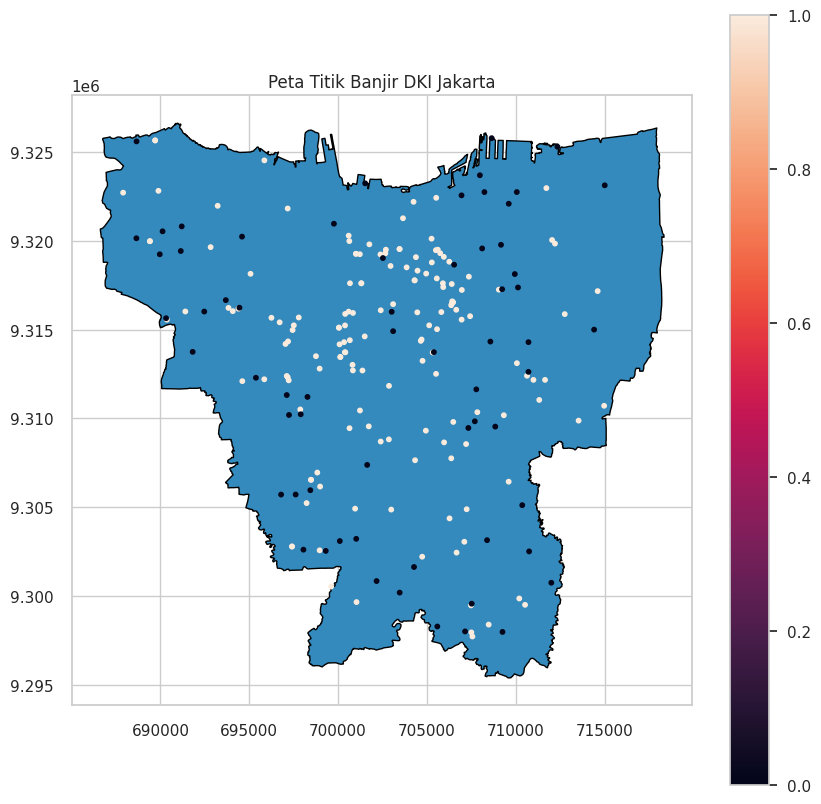

In [184]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plotkan batas wilayah ke axes
batas.plot(ax=ax, edgecolor='black', legend = True)

# Plotkan titik banjir ke axes yang sama
sampling.plot(column = 'Class', ax=ax, markersize=10, legend = True)

# Tambahan: memberikan judul dan tampilkan
plt.title("Peta Titik Banjir DKI Jakarta")
plt.show()

In [185]:
kota = gpd.read_file('/content/Kota.shp')

In [186]:
kota.head()

,OBJECTID,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,Shape_Leng,Shape_Area,geometry
0,1,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.1_1,Cengkareng,None,None,Kecamatan,Sub-district,3174070,None,31193.629963,2.623779e+07,"POLYGON ((688151.367 9316917.839, 688158.156 9..."
1,2,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.2_1,Grogolpetamburan,None,None,Kecamatan,Sub-district,3174040,None,14181.380194,1.082747e+07,"POLYGON ((697322.416 9315982.077, 697309.738 9..."
2,3,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.3_1,Kalideres,None,None,Kecamatan,Sub-district,3174080,None,29234.253123,2.846948e+07,"POLYGON ((688151.367 9316917.839, 688131.109 9..."
3,4,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.4_1,Kebonjeruk,None,None,Kecamatan,Sub-district,3174020,None,22793.871309,1.715234e+07,"POLYGON ((696624.443 9312572.887, 696622.724 9..."
4,5,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.5_1,Kembangan,None,None,Kecamatan,Sub-district,3174010,None,31403.047443,2.519941e+07,"POLYGON ((694765.439 9311926.177, 694754.388 9..."


In [187]:
kota.crs

<Projected CRS: EPSG:32748>
Name: WGS 84 / UTM zone 48S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, southern hemisphere between 80°S and equator, onshore and offshore. Indonesia.
- bounds: (102.0, -80.0, 108.0, 0.0)
Coordinate Operation:
- name: UTM zone 48S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

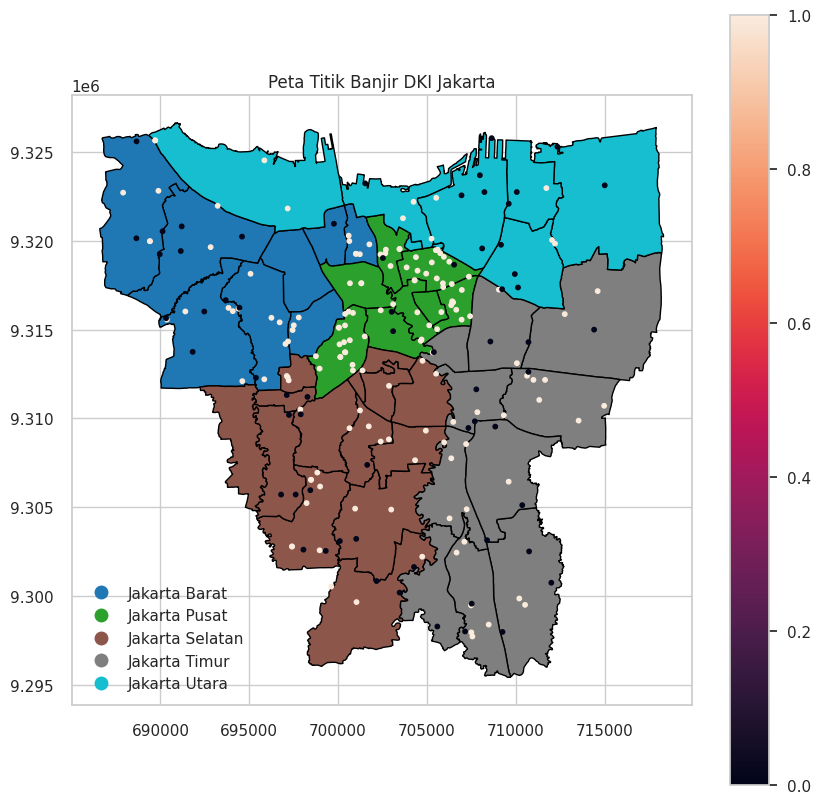

In [188]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plotkan batas wilayah ke axes
kota.plot(column = 'NAME_2', ax=ax, edgecolor='black', legend = True)

# Plotkan titik banjir ke axes yang sama
sampling.plot(column = 'Class', ax=ax, markersize=10, legend = True)

# Tambahan: memberikan judul dan tampilkan
plt.title("Peta Titik Banjir DKI Jakarta")
plt.show()

In [189]:
sampling.to_file("/content/sampling.shp")

In [190]:
sampling.to_csv("/content/sampling.csv")

In [191]:
sampling = pd.read_csv("/content/sampling.csv")

# Split Data

In [192]:
sampling = sampling.drop(['Unnamed: 0', 'ID', 'geometry', 'layer', 'Y', 'X'], axis= 1)

In [193]:
sampling.head()

,land_cover,rainfall,elevation,slope,TWI,disschanne,dissriver,MNDWI,NDBI,NDWI,nightlight,popdensity,sexratio,Class
0,4,4139.84,19.436800,5.93226,3.84336,1382.930,1261.780,-0.292838,0.085813,-0.028947,56.79,113147,99.61,1
1,4,4141.11,0.135218,2.87524,5.03541,403.609,402.492,-0.286593,0.110816,-0.093184,39.97,165179,101.00,1
2,5,4140.06,8.109330,1.76050,5.04900,966.075,1086.650,-0.475638,-0.069557,0.085849,46.67,165179,101.00,1
3,5,4139.57,8.602600,1.61033,4.94122,939.149,1056.830,-0.475638,-0.069557,0.085849,46.67,165179,101.00,1
4,4,4125.00,7.854300,4.91466,5.30018,150.000,256.320,-0.425449,0.177009,-0.172949,42.91,165179,101.00,1


In [194]:
x = sampling.drop('Class', axis=1)

In [195]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   land_cover  218 non-null    int64  
 1   rainfall    218 non-null    float64
 2   elevation   218 non-null    float64
 3   slope       218 non-null    float64
 4   TWI         218 non-null    float64
 5   disschanne  218 non-null    float64
 6   dissriver   218 non-null    float64
 7   MNDWI       218 non-null    float64
 8   NDBI        218 non-null    float64
 9   NDWI        218 non-null    float64
 10  nightlight  218 non-null    float64
 11  popdensity  218 non-null    int64  
 12  sexratio    218 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 22.3 KB


In [196]:
y = sampling['Class']

In [197]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 218 entries, 0 to 217
Series name: Class
Non-Null Count  Dtype
--------------  -----
218 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


# Correaltions

In [198]:
#### Basic Important Modules ####
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')

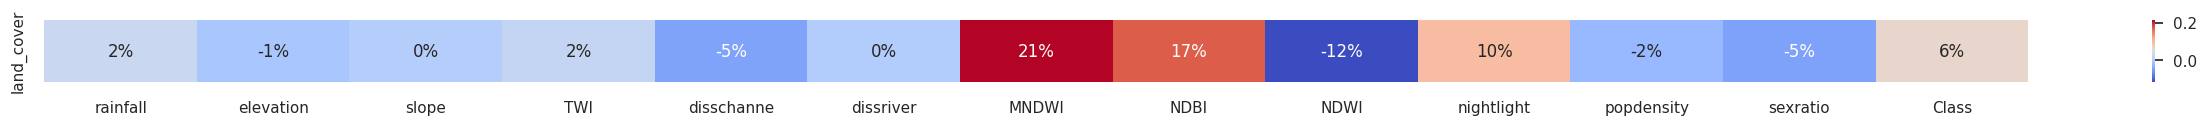

In [199]:
plt.figure(figsize=(32, .8))
sns.heatmap(
    data=sampling.corr('kendall').iloc[:1, 1:],
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
);

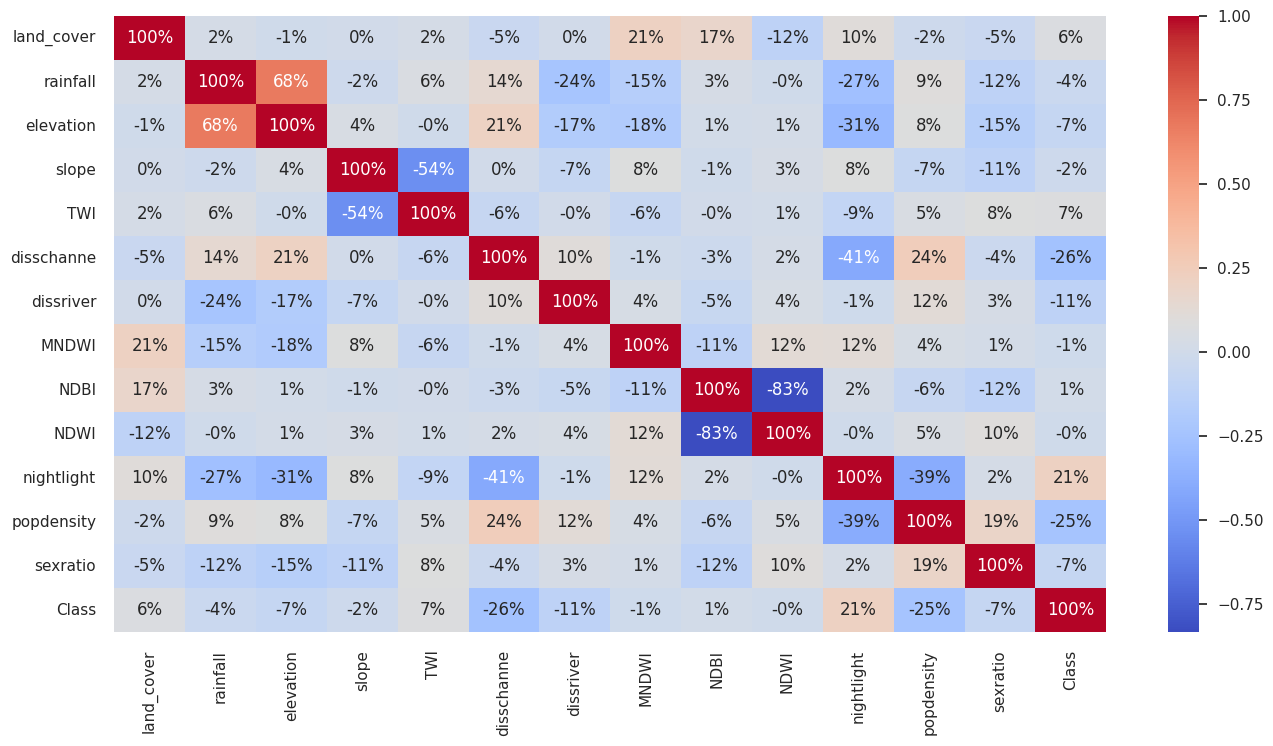

In [200]:
# Numerical Input - Categorical Output
# Kendall's Method
plt.figure(figsize=(16, 8))
sns.heatmap(
    data=sampling.corr('kendall'),
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
);

# Start Machine Learning

In [201]:
#### Sckit Learn Specific Modules ####
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, KFold
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from yellowbrick.model_selection import CVScores
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [202]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   land_cover  218 non-null    int64  
 1   rainfall    218 non-null    float64
 2   elevation   218 non-null    float64
 3   slope       218 non-null    float64
 4   TWI         218 non-null    float64
 5   disschanne  218 non-null    float64
 6   dissriver   218 non-null    float64
 7   MNDWI       218 non-null    float64
 8   NDBI        218 non-null    float64
 9   NDWI        218 non-null    float64
 10  nightlight  218 non-null    float64
 11  popdensity  218 non-null    int64  
 12  sexratio    218 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 22.3 KB


# Split Data againn

In [203]:
categorical_features = [0]
#index of numerical features from the dataset
numerical_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
preprocessor = ColumnTransformer([
    ('ohe_landuse', OneHotEncoder(categories='auto', handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numerical_features)])

In [204]:
# Misal X dan y sudah disiapkan sebelumnya
# Langkah 1: Split ke Train+Val dan Test (misal 70% train+val, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)

In [205]:
# Misal X dan y sudah disiapkan sebelumnya
# Langkah 1: Split ke Train+Val dan Test (misal 70% train+val, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)

# Train RF

In [206]:
model_rf = RandomForestClassifier(n_estimators=200, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [207]:
y_pred_rf = model_rf.predict(x_test)

In [208]:
print(classification_report(y_test, y_pred_rf, target_names = ['non_flood', 'flood']))

              precision    recall  f1-score   support

   non_flood       0.57      0.21      0.31        19
       flood       0.75      0.94      0.83        47

    accuracy                           0.73        66
   macro avg       0.66      0.57      0.57        66
weighted avg       0.70      0.73      0.68        66



In [209]:
print(accuracy_score(y_test, y_pred_rf))

0.7272727272727273


In [210]:
print(classification_report(y_test, y_pred_rf, target_names = ['non_flood', 'flood']))

              precision    recall  f1-score   support

   non_flood       0.57      0.21      0.31        19
       flood       0.75      0.94      0.83        47

    accuracy                           0.73        66
   macro avg       0.66      0.57      0.57        66
weighted avg       0.70      0.73      0.68        66



In [211]:
print(accuracy_score(y_test, y_pred_rf))

0.7272727272727273


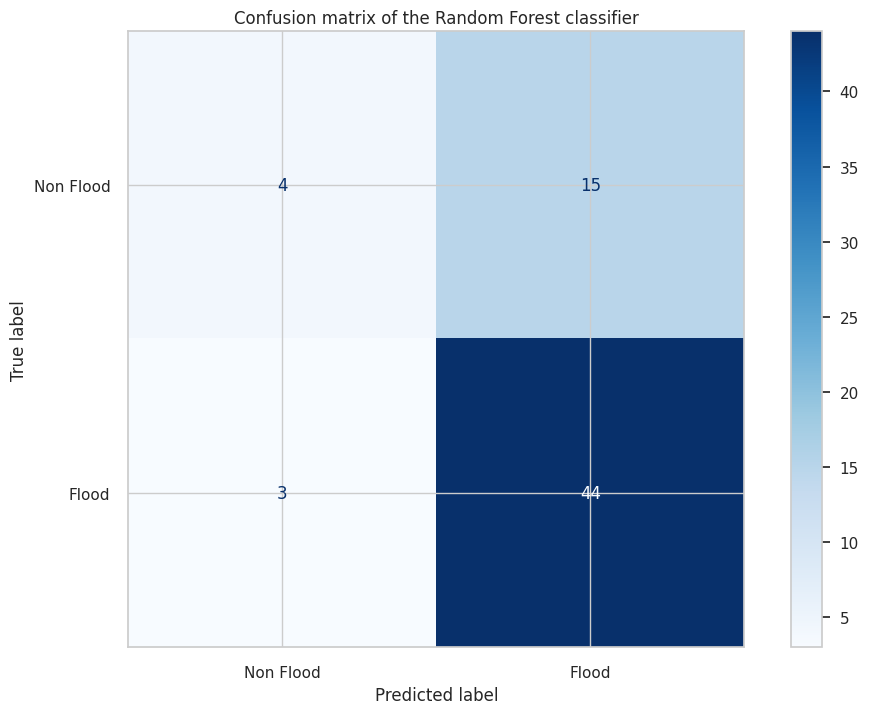

In [212]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf,
                                        cmap="Blues",
                                        display_labels=["Non Flood", "Flood"])

plt.title('Confusion matrix of the Random Forest classifier')
plt.show()

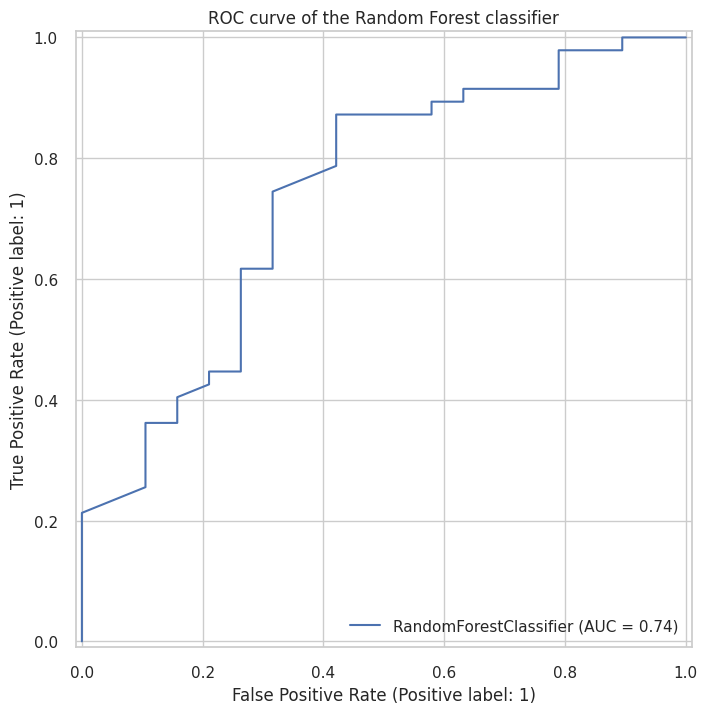

In [213]:
# metrics.plot_roc_curve(model_rf, x_test, y_test) # deprecated
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model_rf, x_test, y_test)
plt.title('ROC curve of the Random Forest classifier')
plt.show()

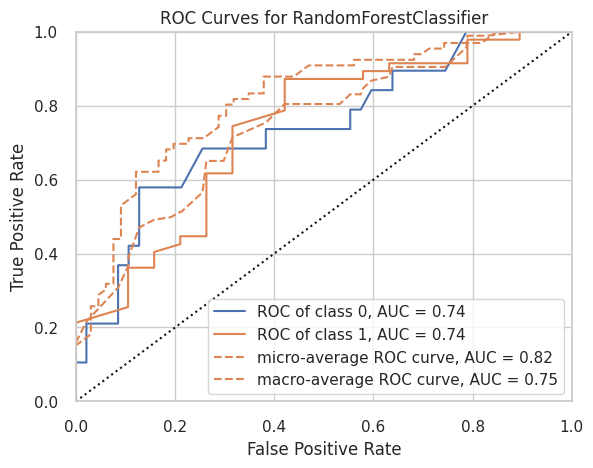

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [214]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(6.4, 4.8))
visualizer = ROCAUC(
    model_rf,
    is_fitted=True
)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [215]:
batas.bounds

,minx,miny,maxx,maxy
0,686589.2461,9.295424e+06,718314.8926,9.326648e+06


In [216]:
kota.bounds

,minx,miny,maxx,maxy
0,688151.3674,9.315505e+06,696476.2196,9.323232e+06
1,695600.4958,9.315967e+06,699779.1517,9.320713e+06
2,686589.2461,9.316918e+06,691619.9413,9.325980e+06
3,693383.3051,9.311572e+06,697341.2587,9.319016e+06
4,689910.5793,9.311682e+06,695423.1700,9.319021e+06
5,697180.2598,9.313414e+06,700349.4947,9.317279e+06
6,700344.8882,9.318516e+06,702309.2869,9.322077e+06
7,697986.8302,9.318572e+06,700536.1872,9.321994e+06
8,705291.5701,9.314752e+06,707899.2184,9.318038e+06
9,698972.9672,9.316008e+06,703252.4706,9.318964e+06


In [217]:
result_rf = pd.DataFrame(y_pred_rf, columns=['Class'])

In [218]:
result_rf = stack.predict_proba(model_rf)

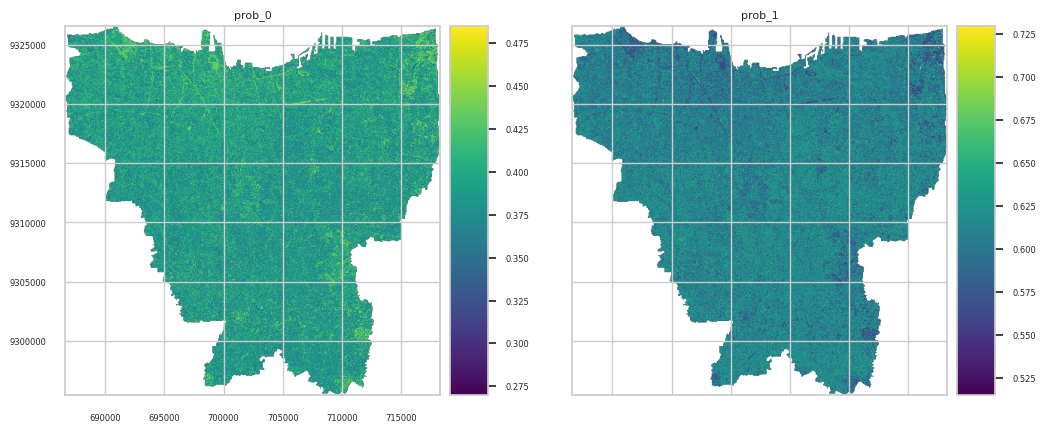

In [219]:
result_rf.plot()
plt.show()

In [220]:
result_rf.write(r"random forest susceptibility.tif")

Raster Object Containing 2 Layers
    attribute                                             values
0       names                                   [prob_0, prob_1]
1       files  [random forest susceptibility.tif, random fore...
2        rows                                               1040
3        cols                                               1057
4         res                                       (30.0, 30.0)
5  nodatavals  [-3.4028234663852886e+38, -3.4028234663852886e...


In [221]:
print(raster_list)

['/content/raster/1057_1040_LULC.tif', '/content/raster/1057_1040_NDBI.tif', '/content/raster/1057_1040_TWI.tif', '/content/raster/1057_1040_popdensity.tif', '/content/raster/1057_1040_nightlight.tif', '/content/raster/1057_1040_NDWI.tif', '/content/raster/1057_1040_profile_curvature.tif', '/content/raster/1057_1040_MNDWI.tif', '/content/raster/1057_1040_TPI.tif', '/content/raster/1057_1040_elevation.tif', '/content/raster/1057_1040_rainfall.tif', '/content/raster/1057_1040_sexratio.tif', '/content/raster/1057_1040_slope.tif']


# END OF THE DAY
# Jumu'ah, 25th July 2025

### Tantangan saya dalam machine learning adalah masalah preparasi data. Pengaturan extent cukup sulit, harus teliti dan jeli. Extent di ArcGIS masih berantakan, tidak bisa sama jumlah numpy array nya. Solusinya, saya menggunakan SAGA GIS dan GDAL dari QGIS. Pengaturan extent disana lebih rapi.

### Inilah yang menarik dari machine learning, dengan python dimana dataset yang digunakan harus benar-benar memiliki extent yang sama. Resolusi sama, tidak menjamin memiliki extent sama. Selisih 1 atau 2 jumlah numpy / shape akan berpengaruh. Hal ini mengakibatkan dataset tidak bisa diaplikasikan analisis machine learning

### Raster list bisa digunakan untuk apply ke hasil model random forest, dimana raster list adalah list raster dataset. Meskipun memiliki nama berbeda, dan parameter yang berbeda, hal ini masih bisa dilakukan

### Raster list dibuat dengan gdal dan predictors dibuat dengan rasterio

### Sebaliknya, Predictors list tidak bisa digunakan untuk aplikasi penerapan hasil model machine learning, alasannya masih belum tahu

### Raster list dibuat untuk mengetahui extent citra tif

